Import packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import random as rd
rd.seed(9)

Import datasets

In [2]:
dataset=pd.read_csv(f"Dataset 999 cases, 20% broken")
testset=pd.read_csv(f"Test set 1000 cases, 20% broken")

Clear datasets and create 

In [3]:
dataset=dataset.drop("Unnamed: 0", axis='columns')
testset=testset.drop("Unnamed: 0", axis='columns')

Xtrain=dataset.drop("working", axis="columns")
Xmean=Xtrain.mean()
Xstd=Xtrain.std()
Xtrain=(Xtrain-Xmean)/Xstd
Xtrain=Xtrain.fillna(0.)
ytrain=dataset.drop(["T_cpu", "fan.T_air", "fan.tension"], axis="columns")
Xtrain=Xtrain.to_numpy()
ytrain=ytrain.to_numpy().ravel()

Xtest=testset.drop("working", axis="columns")
ytest=testset.drop(["T_cpu", "fan.T_air", "fan.tension"], axis="columns")
Xtest=(Xtest-Xmean)/Xstd
Xtest=Xtest.fillna(0)
Xtest=Xtest.to_numpy()
ytest=ytest.to_numpy().ravel()

Create and train the neural network

In [4]:
neuralNetwork = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(10, 10, 10, 10), random_state=1, verbose=True, shuffle=True)
neuralNetwork.fit(Xtrain, ytrain)

Iteration 1, loss = 1.06451032
Iteration 2, loss = 0.98051419
Iteration 3, loss = 0.87864709
Iteration 4, loss = 0.78102545
Iteration 5, loss = 0.69984114
Iteration 6, loss = 0.63440265
Iteration 7, loss = 0.58402459
Iteration 8, loss = 0.54585454
Iteration 9, loss = 0.51631973
Iteration 10, loss = 0.49270210
Iteration 11, loss = 0.47264671
Iteration 12, loss = 0.45586240
Iteration 13, loss = 0.44112806
Iteration 14, loss = 0.42796093
Iteration 15, loss = 0.41631340
Iteration 16, loss = 0.40562864
Iteration 17, loss = 0.39595540
Iteration 18, loss = 0.38708886
Iteration 19, loss = 0.37861920
Iteration 20, loss = 0.37059436
Iteration 21, loss = 0.36291725
Iteration 22, loss = 0.35571010
Iteration 23, loss = 0.34878971
Iteration 24, loss = 0.34206057
Iteration 25, loss = 0.33553391
Iteration 26, loss = 0.32910040
Iteration 27, loss = 0.32279392
Iteration 28, loss = 0.31658425
Iteration 29, loss = 0.31061397
Iteration 30, loss = 0.30489785
Iteration 31, loss = 0.29929745
Iteration 32, los

D:\Micromamba\envs\stage\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10, 10, 10), random_state=1,
              solver='sgd', verbose=True)

Data gathering

In [5]:
resultTest=neuralNetwork.predict(Xtest)
probas=neuralNetwork.predict_proba(Xtest)
probasDelta=[]
for k in range(len(probas)):
    probasDelta.append(abs(probas[k][0]-probas[k][1]))

In [6]:
maskTrue=testset["working"]==True
maskFalse=testset["working"]==False

In [7]:
np.median(probas[maskFalse][:,0]), probas[maskFalse][:,0].mean(), probas[maskFalse][:,0].std(), np.min(probas[maskFalse][:,0]), np.max(probas[maskFalse][:,0])

(0.9811012476517628,
 0.9720487798274992,
 0.016488032493468117,
 0.9305218652174045,
 0.9892030697164387)

In [13]:
np.median(probas[maskTrue][:,1]), probas[maskTrue][:,1].mean(), probas[maskTrue][:,1].std(), np.min(probas[maskTrue][:,1]), np.max(probas[maskTrue][:,1])

(0.9981855253950355,
 0.9856468777442228,
 0.02661736570501551,
 0.9212633772343817,
 0.9998158112028251)

In [8]:
probas

array([[9.75104916e-01, 2.48950844e-02],
       [1.84188797e-04, 9.99815811e-01],
       [9.75039198e-01, 2.49608019e-02],
       ...,
       [6.96924777e-02, 9.30307522e-01],
       [9.79931153e-01, 2.00688469e-02],
       [6.97253639e-02, 9.30274636e-01]])

In [9]:
neuralNetwork.score(Xtest, ytest)

1.0

In [10]:
min(dataset["fan.T_air"]), max(dataset["fan.T_air"]), min(testset["fan.T_air"]), max(testset["fan.T_air"])

(0.0, 30.0, 0.0, 29.97)

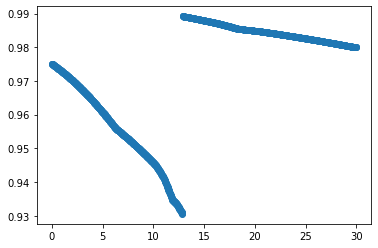

In [20]:
plt.scatter(testset[maskFalse]["fan.T_air"], probas[maskFalse][:,0])

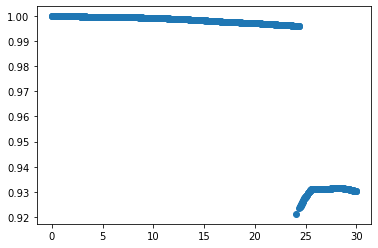

In [21]:
plt.scatter(testset[maskTrue]["fan.T_air"], probas[maskTrue][:,1])

{'whiskers': [<matplotlib.lines.Line2D at 0x19f73fff2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x19f73fff970>,
 'boxes': [<matplotlib.lines.Line2D at 0x19f73ff1fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x19f73fffe50>],
 'fliers': [<matplotlib.lines.Line2D at 0x19f7400e160>],
 'means': []}

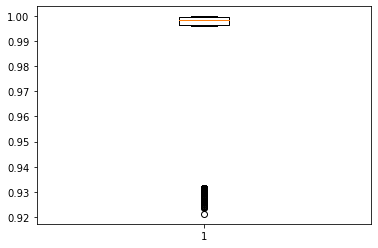

In [24]:
plt.boxplot(probas[maskTrue][:,1])